Name

Labpartner(s)

In [ ]:
#import statements go here


# Class 11.1

#### Announcements

- Reminder **all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by end of the day 4/1 to pass the class.** The last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.
 
- Lab on Wed will be light on programming, as you have final research proposals this week. More on this on Wednesday, and you will have the oppertunity to work on them in the lab period then. See research proposal assignment on github

# Warmups 11.1

For warmups today you will share your plot animations.

# Lecture 11.1

### Agenda:
- Predator prey modeling. 

## Predator Prey Modeling

See original here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### Numerical solution using Python

A simple python code for solving these equations is shown below.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the initial parameters
alpha = 1.
beta = 1.2     #ratessss
gamma = 4.
delta = 1.

In [3]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [ ]:
# define the function that represents the Lotka-Volterra equations
# returns for any given u here, and you can either send you you is that
#X, Y state of the system, so at any given time that's like what the population is.

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    #return np.array(y=alpha/beta, x=gamma/delta)
    #return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [60]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [6]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [7]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

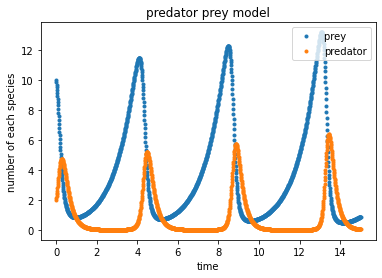

In [8]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

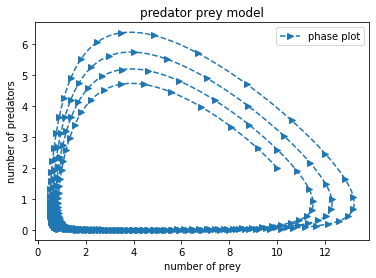

In [9]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 11.1

## E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

Based on the plot below
10 times bigger = it increases the incremental change in time so it makes the predation and growing population of prey faster? I'm not entriely sure

Based on the plot below
10 times smaller =  it decreases the incremental change in time so it makes the predation and growing population of prey slower? So finer plot line.
I'm not entriely sure 

100 times smaller it decreases the incremental change in time so it makes the predation and growing population of prey slower? So finer plot line.
I'm not entriely sure 

In [ ]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [17]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model 10x bigger')

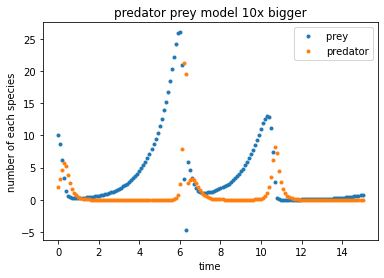

In [18]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model 10x bigger")

#------------------------------------
#phase plot


Text(0.5, 1.0, 'predator prey model')

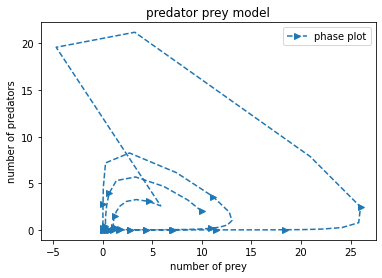

In [19]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [20]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
    

    

In [21]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model 10x smaller')

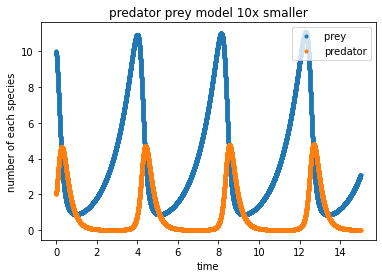

In [22]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model 10x smaller")

Text(0.5, 1.0, 'predator prey model')

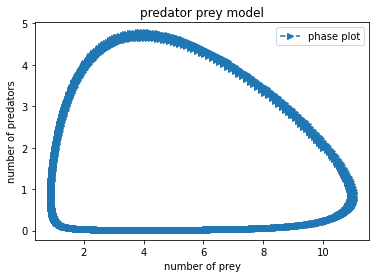

In [23]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [24]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.0001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [25]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model 100x smaller')

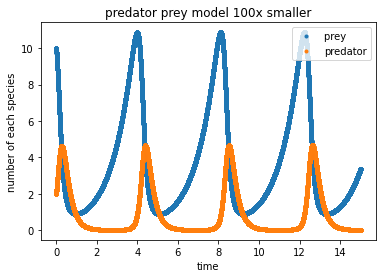

In [26]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model 100x smaller")

Text(0.5, 1.0, 'predator prey model')

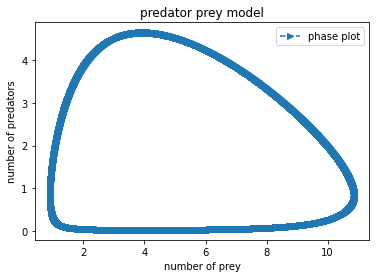

In [27]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

## E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot. What happens if you start at the steady state? What happens if you start near the steady state?

In [180]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [183]:

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
   # x = u[0]
    #y = u[1]
    #return np.array(y=alpha/beta, x=gamma/delta)
    x=gamma/delta
    y=alpha/beta
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

In [66]:
steady_x=gamma/delta
steady_y=alpha/beta

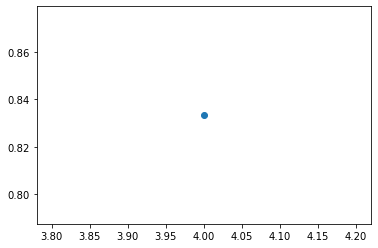

In [80]:
#plt.plot(steady_x,steady_y, color='g')
plt.scatter(steady_x,steady_y) #AHA! :((((((((((((((( #crying*

In [184]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [185]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

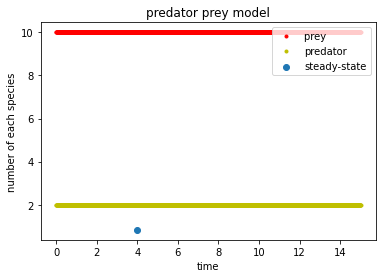

In [124]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

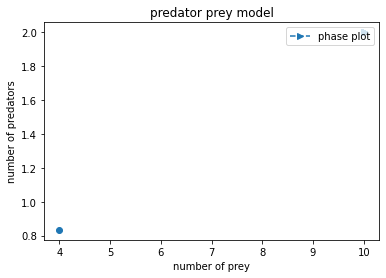

In [186]:

plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
plt.scatter(steady_x, steady_y, label ='steady-state')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [ ]:
# If the I start at the stedy state, the model remains fixed or unchangeg

## Another time stepping method with higher order of accuracy

## E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ?

In [ ]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [ ]:

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

In [188]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

In [189]:
# set time-increment and discretize the time
#FOR 0.1
T  = 15.0                           # final time
dt = 0.1                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)

In [190]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

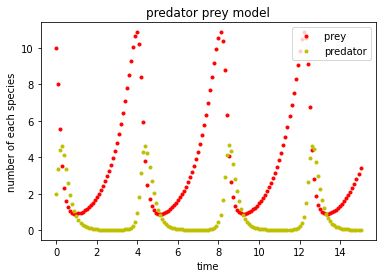

In [191]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
#plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

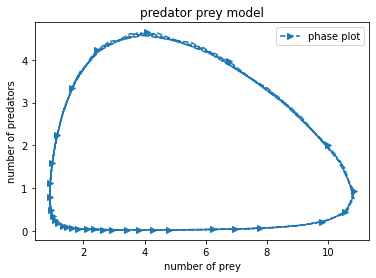

In [192]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [171]:
# set time-increment and discretize the time
#FOR 0.01
T  = 15.0                           # final time
dt = 0.001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)

In [172]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

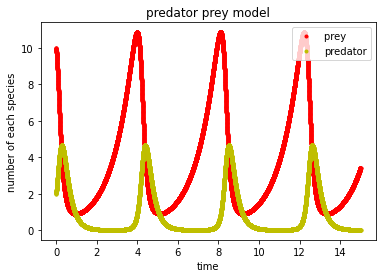

In [173]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
#plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")

plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

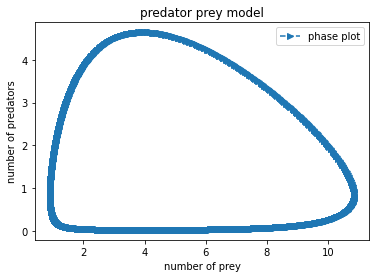

In [174]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [176]:
# set time-increment and discretize the time
#FOR 0.1
T  = 15.0                           # final time
dt = 0.0001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)

Text(0.5, 1.0, 'predator prey model')

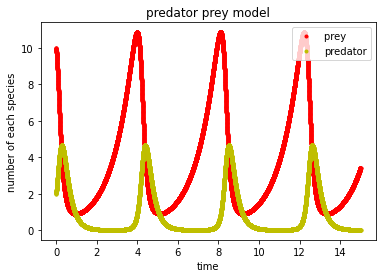

In [177]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
#plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")

plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

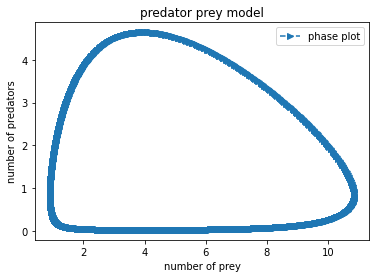

In [179]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [ ]:
#There is a very slight variation on the output

The cycle stays

## E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

In [281]:
# set the initial parameters
alpha = 1.
#alpha = 10 #
beta = 1.2 #ratessss
#beta = 10 #
gamma = 4.
#gamma = 10. #
#delta = 1.
delta = 10. #

In [282]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [283]:
# define the function that represents the Lotka-Volterra equations
# returns for any given u here, and you can either send you you is that
#X, Y state of the system, so at any given time that's like what the population is.

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    #return np.array(y=alpha/beta, x=gamma/delta)
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [284]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #intial prey amt
y0 = 2.  #initial pred. amy
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [285]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

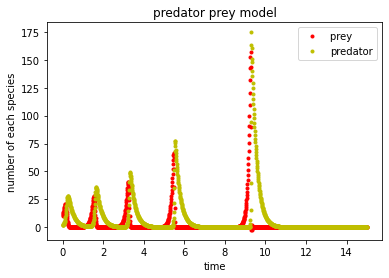

In [265]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
#plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")

plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

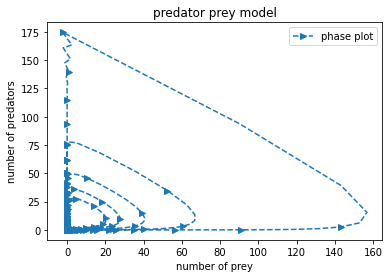

In [266]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [267]:
#Changing the alpha change the predation rate, higher alpha slower recovery

Text(0.5, 1.0, 'predator prey model')

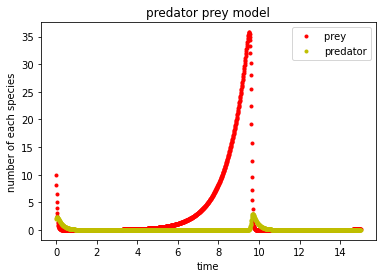

In [259]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
#plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")

plt.ylabel("number of each species")
#title
plt.title("predator prey model")

#Higher beta = very slowww predation

Text(0.5, 1.0, 'predator prey model')

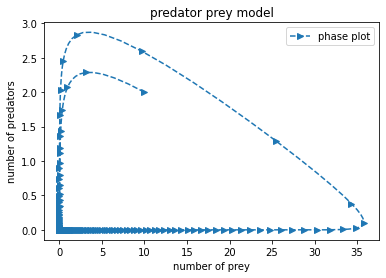

In [273]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

#Higher bete made the predator population very low

Text(0.5, 1.0, 'predator prey model')

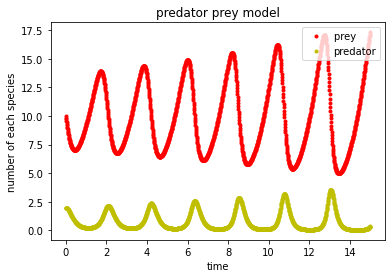

In [279]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
#plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")

plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

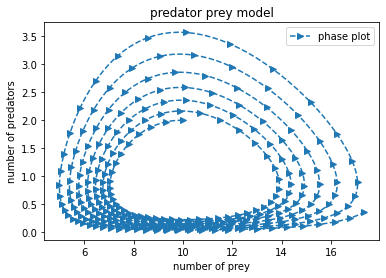

In [280]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

#Higher gama changes the rate of cycle so that both species never get to be in the same amount? Dont quite understANDS

Text(0.5, 1.0, 'predator prey model')

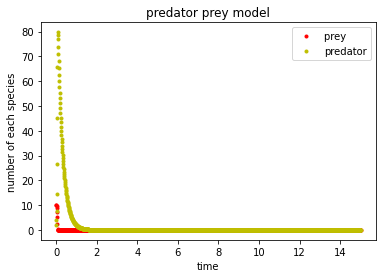

In [286]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
#plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")

plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

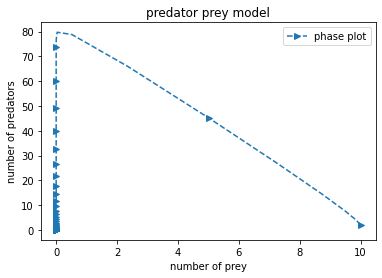

In [288]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

#Higher delta = Very slow recovery for prey?

## E.5 (Advanced)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example

In [297]:
#SELF-EATING
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [298]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [299]:

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), (-y*gamma + delta*x*y - alpha*(y**2))])

In [295]:
T  = 15.0                           # final time
dt = 0.01                         # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditio
ns
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [300]:

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

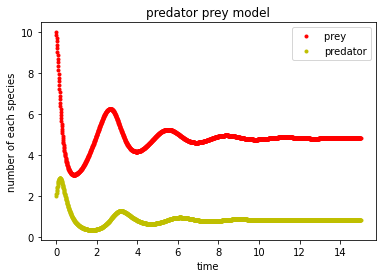

In [301]:
plt.plot(time, x_euler, '.',color='r', label = 'prey ')
plt.plot(time, y_euler, '.', color='y',label = 'predator')
#plt.plot(steady_x,steady_y)
#plt.scatter(steady_x,steady_y, label = 'steady-state')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")

plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

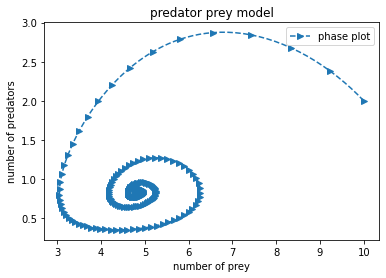

In [302]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")
